<a href="https://colab.research.google.com/github/aiden-dm/CSCI-4170/blob/main/CSCI_4170_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projects in AI and ML - Homework 1**
##**Aiden Drover-Mattinen**##

#Task 1: Advanced Objective Function and Use Case

## Deriving logistic regression function using Maximum Likelihood Estimation (MLE)

Since there are only two discrete outcomes for the logistic regression, we are working with a Bernoulli distribution. As a result, we can represent the probability $p(y|x)$ that our classifier produces for one observation as follows:

$$ p(y|x) = \hat{y}^{y}(1-\hat{y})^{1-y}$$

It is better computationally to work with the log-likelihood, as it will prevent underflow when multiplying many less than one probabilities together. As a result, we take the log of both sides of our equation:

$$ \log(p(y|x)) = \log(\hat{y}^{y}(1-\hat{y})^{1-y})$$
$$ \log(p(y|x)) = \log(\hat{y}^{y})+\log((1-\hat{y})^{1-y})$$
$$ \log(p(y|x)) = y\log(\hat{y})+(1-y)\log(1-\hat{y})$$

The above equation represents a probability that we want to maximize. To turn it into a loss function, i.e. something we want to minimize, we simply flip its sign as follows:

$$ l(y, \hat{y}) = -[y\log(\hat{y})+(1-y)\log(1-\hat{y})]$$

To get the cost, or objective, function that we will minimize for all the observation in the dataset, we need to extend our loss function across all observations. Assuming that all data points are independent, the likelihood for the entire dataset can be written as follows:

$$p(y|X) = \prod_{i=1}^n p(y_i|x_i) = \prod_{i=1}^n \hat{y_i}^{y_i}(1-\hat{y_i})^{1-y_i}$$

Taking the log likelihood:

$$L(y, \hat{y}) = \log(\prod_{i=1}^n \hat{y_i}^{y_i}(1-\hat{y_i})^{1-y_i})$$
$$L(y, \hat{y}) = \sum_{i=1}^n \log(\hat{y_i}^{y_i}(1-\hat{y_i})^{1-y_i})$$
$$L(y, \hat{y}) = \sum_{i=1}^n [y_i\log(\hat{y_i})+(1-y_i)\log(1-\hat{y_i})]$$

Flipping the sign to create the loss function:

$$L(y, \hat{y}) = -\sum_{i=1}^n [y_i\log(\hat{y_i})+(1-y_i)\log(1-\hat{y_i})]$$

Finally, we normalize the loss function by taking its average:

$$L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n [-y_i\log(\hat{y_i})-(1-y_i)\log(1-\hat{y_i})]$$

Sources:

*   https://web.stanford.edu/~jurafsky/slp3/5.pdf



## Maximum Likelihood Estimation vs. Maximum A Posteriori

**Maximum Likelihood Estimation (MLE)** and **Maximum A Posteriori (MAP)** are both methods for estimating individual variables in the setting of probability distributions or graphical models. The strategies differ slightly in their goals:

In the case of MLE, we can write the likelihood of observing data $X$ given the model parameters $\theta$ as follows:

$$ P(X|\theta) $$

We want to find the parameters that give the highest likelihood of predicting the data we collected, or in the case of logistic regression, find the parameters that best fit our model to our data and his occurs when the likelihood of observing $X$ given $\theta$ is maximized. We can express this thinking mathematically as follows:

$$ \theta_{MLE} = \arg\max_{\theta}P(X|\theta)$$

As we did above, we use the logarithm function for computational purposes, producing the following:

$$ \theta_{MLE} = \arg\max_{\theta}\log(P(X|\theta))$$
$$ = \arg\max_{\theta}\{\log(\prod_{i=1}^nP(x_{i}|\theta))\}$$
$$ = \arg\max_{\theta}\{\sum_{i=1}^n\log(P(x_{i}|\theta))\}$$

Conversely, in MLE we take more information into account. Like in MLE we will consider both the likehood **and** prior knowledge of the system's state. Do do this, we work in a posterior distribution. A posterior is the product of likelihood and prior, as demonstrated by Bayes' rule below:

$$ P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} $$

In the context of logistic regression, the above formula gives a distribution of possible $\theta$ values given our data $X$. To obtain the range of possible parameters, we take into account the likelihood of getting our data given the parameters, $P(X|\theta)$ and our prior belief about the parameters before seeing the data, $P(\theta)$. This is different than MLE, that gives only a single point estimate for the parameters $\theta$ and does not take any prior knowledge into consideration.

In logistic regression using MAP, we want to find the most probable set of parameters after considering how well they explain the observed data and our prior belief about the parameters. Mathematically, this means we want to maximize the posterior distribution, $P(\theta|X)$. We can express this as follows:

Note: we ignore the normalizing constant $P(X)$ because it only depends on the data and not the parameters we wish to find. Thus, it is the same for all values of $\theta$ and can be ignored. This also makes the computation less complicated and expensive. Additionally, we use the log function as we did for MLE.

$$ \theta_{MLE} = \arg\max_{\theta}P(X|\theta)P(\theta)$$
$$ = \arg\max_{\theta}\log(P(X|\theta)P(\theta))$$
$$ = \arg\max_{\theta}\{\log(\prod_{i=1}^nP(x_{i}|\theta)) + \log(P(\theta))\}$$
$$ = \arg\max_{\theta}\{\sum_{i=1}^n\log(P(x_{i}|\theta)) + \log(P(\theta))\}$$

By observing the two equations, we can see that MLE is actually a special, simplified case of MAP where it is assumed that we have no prior knowledge of our desired parameters!

Sources:


*   https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html
*   https://www.youtube.com/watch?v=jW_J-8S-gUc
*   https://agustinus.kristia.de/blog/mle-vs-map/


## Problem to be solved, and justification of logistic regression

Machine learning has vast applications in medicine, particularly in its ability to make predictions that can improve patient outcomes. Given that heart disease is the leading cause of death in the United States, accounting for 1 in 5 deaths in 2021, predicting whether a person has heart disease using demographic and medical data is both a valuable and impactful problem to solve.

I believe logistic regression is the ideal choice for tackling this issue. First, the problem is binary — a person either has heart disease or they do not — making logistic regression a natural fit for binary classification tasks. It directly models the probability of the outcome, offering a clear interpretation of how likely heart disease is based on the given factors. Additionally, logistic regression provides coefficients that indicate the contribution of each feature, which is essential in medical applications where understanding the importance of different factors is key. Lastly, logistic regression is computationally efficient, allowing for quick training and evaluation, making it a solid starting point in this problem domain.

While decision trees are another classification algorithm we discussed in class, I do not think they are as well suited for this particular task. Decision trees segment the data into discrete regions based on feature values, which makes it harder to intuitively interpret how each feature influences the likelihood of heart disease. Given the importance of interpretability in healthcare, logistic regression’s straightforward approach is more aligned with the needs of this problem. Moreover, decision trees tend to overfit more than logistic regression, which could result in a model that performs poorly on new, unseen data. Since we want to develop a model that generalizes well and can be trusted in clinical settings, logistic regression is the more reliable choice.

Sources

*   https://my.clevelandclinic.org/health/diseases/24129-heart-disease

## How my dataset corresponds to the variables in my equations

For this project, I have chosen a publicly available dataset from Kaggle, which can be accessed via the following link: https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data

The dataset is structured such that each row represents an individual, with each column corresponding to a specific health or demographic attribute. The columns include the following (copied from the dataset's description on Kaggle):

* Age: The individual's age.
* Gender: The individual's gender (Male or Female).
* Blood Pressure: The individual's systolic blood pressure.
* Cholesterol Level: The individual's total cholesterol level.
* Exercise Habits: The individual's exercise habits (Low, Medium, High).
* Smoking: Whether the individual smokes (Yes or No).
* Family Heart Disease: Whether there is a family history of heart disease (Yes or No).
* Diabetes: Whether the individual has diabetes (Yes or No).
* BMI: The individual's body mass index.
* High Blood Pressure: Whether the individual has high blood pressure (Yes or No).
* Low HDL Cholesterol: Whether the individual has low HDL cholesterol (Yes or No).
* High LDL Cholesterol: Whether the individual has high LDL cholesterol (Yes or No).
* Alcohol Consumption: The individual's alcohol consumption level (None, Low, Medium, High).
* Stress Level: The individual's stress level (Low, Medium, High).
* Sleep Hours: The number of hours the individual sleeps.
* Sugar Consumption: The individual's sugar consumption level (Low, Medium, High).
* Triglyceride Level: The individual's triglyceride level.
* Fasting Blood Sugar: The individual's fasting blood sugar level.
* CRP Level: The C-reactive protein level (a marker of inflammation).
* Homocysteine Level: The individual's homocysteine level (an amino acid that affects blood vessel health).
* Heart Disease Status: The individual's heart disease status (Yes or No).

The columns containing the health and demographic information (excluding "Heart Disease Status") are stored in the variable $X$, which will be used in the logistic regression likelihood function. The values in the "Heart Disease Status" column are the binary outcomes we want to predict and are stored in $y$. Here, $x_i$ represents individual rows in $X$, and $y_i$ represents the corresponding binary values in $y$.

The likelihood function is given by:

$$p(y|X) = \prod_{i=1}^n p(y_i|x_i)$$

In the loss function, $\hat{y}$ corresponds to the list of predictions made by our model, which predict whether a person has heart disease. These predictions will be compared against the true values in $y$ to evaluate the model's performance. The loss function used for logistic regression is:

$$L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n [-y_i\log(\hat{y_i})-(1-y_i)\log(1-\hat{y_i})]$$

Logistic regression also requires a few assumptions about the data. First, we assume that the dependent variable—whether or not the individual has heart disease—is binary. Second, we assume that the independent variables (the demographic and medical information) are independent of each other, meaning that there is no multicollinearity between the features. Finally, we assume that the independent variables have a linear relationship with the log odds of the dependent variable (i.e., the logit function).

Source:
* https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/










# Task 2: Dataset and Advanced EDA


I accessed my dataset from Kaggle. The following is the link to it: https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data

## Performing Exploratory Data Analysis (EDA)

I will start by importing necessary libraries and reading the dataset from a csv file.

In [ ]:
# Standard library imports
import random

# Third-party library imports
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Read in the data from a csv file
data = pd.read_csv('/content/drive/MyDrive/CSCI4170_Datasets/heart_disease.csv')

In [ ]:
# Print out the first 5 rows of the dataframe
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


### Handling empty values within the data

We need to determine if there are any missing values within the dataset. If they exist, we need to identify how many there are and in which columns they are located. Below, I calculate the proportion of missing values across the entire dataset, as well as on a column-by-column basis

In [ ]:
# Count rows with at least one NaN value
rows_with_nan = data.isna().any(axis=1).sum()

# Total number of rows in the dataset
total_rows = len(data)

# Print results
print(f"Number of rows with at least one NaN value: {rows_with_nan}")
print(f"Total number of rows in the dataset: {total_rows}")
print(f"Proportion of empty rows: {rows_with_nan/total_rows}")

Number of rows with at least one NaN value: 2933
Total number of rows in the dataset: 10000
Proportion of empty rows: 0.2933


In [ ]:
# Find the proportion of missing values in each column to the entire dataset
data.isna().sum() / len(data)

,0
Age,0.0029
Gender,0.0019
Blood Pressure,0.0019
Cholesterol Level,0.0030
Exercise Habits,0.0025
Smoking,0.0025
Family Heart Disease,0.0021
Diabetes,0.0030
BMI,0.0022
High Blood Pressure,0.0026


A significant proportion, nearly 30%, of the rows contain missing values. However, removing all of these rows would result in an unnecessary loss of information. The proportion of missing values in most columns is very small relative to the entire dataset, which makes data imputation a viable solution. The only exception is alcohol consumption, which has a substantial proportion of missing values (0.25). Given this, it might be best to remove the alcohol consumption column from the dataset entirely.

The following code removes the alcohol consumption column, and visualizes the distributions of the remaining columns' to guide my imputation strategy.

In [ ]:
# Drop the alcohol consumption column and print beginning of new data
data.drop('Alcohol Consumption', axis=1, inplace=True)
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
# Print out information to find types of numerical and categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Stress Level          9978 non-null   object 
 13  Sleep Hours           9975 non-null   float64
 14  Sugar Consumption     9970 non-null   object 
 15  Triglyceride Level  

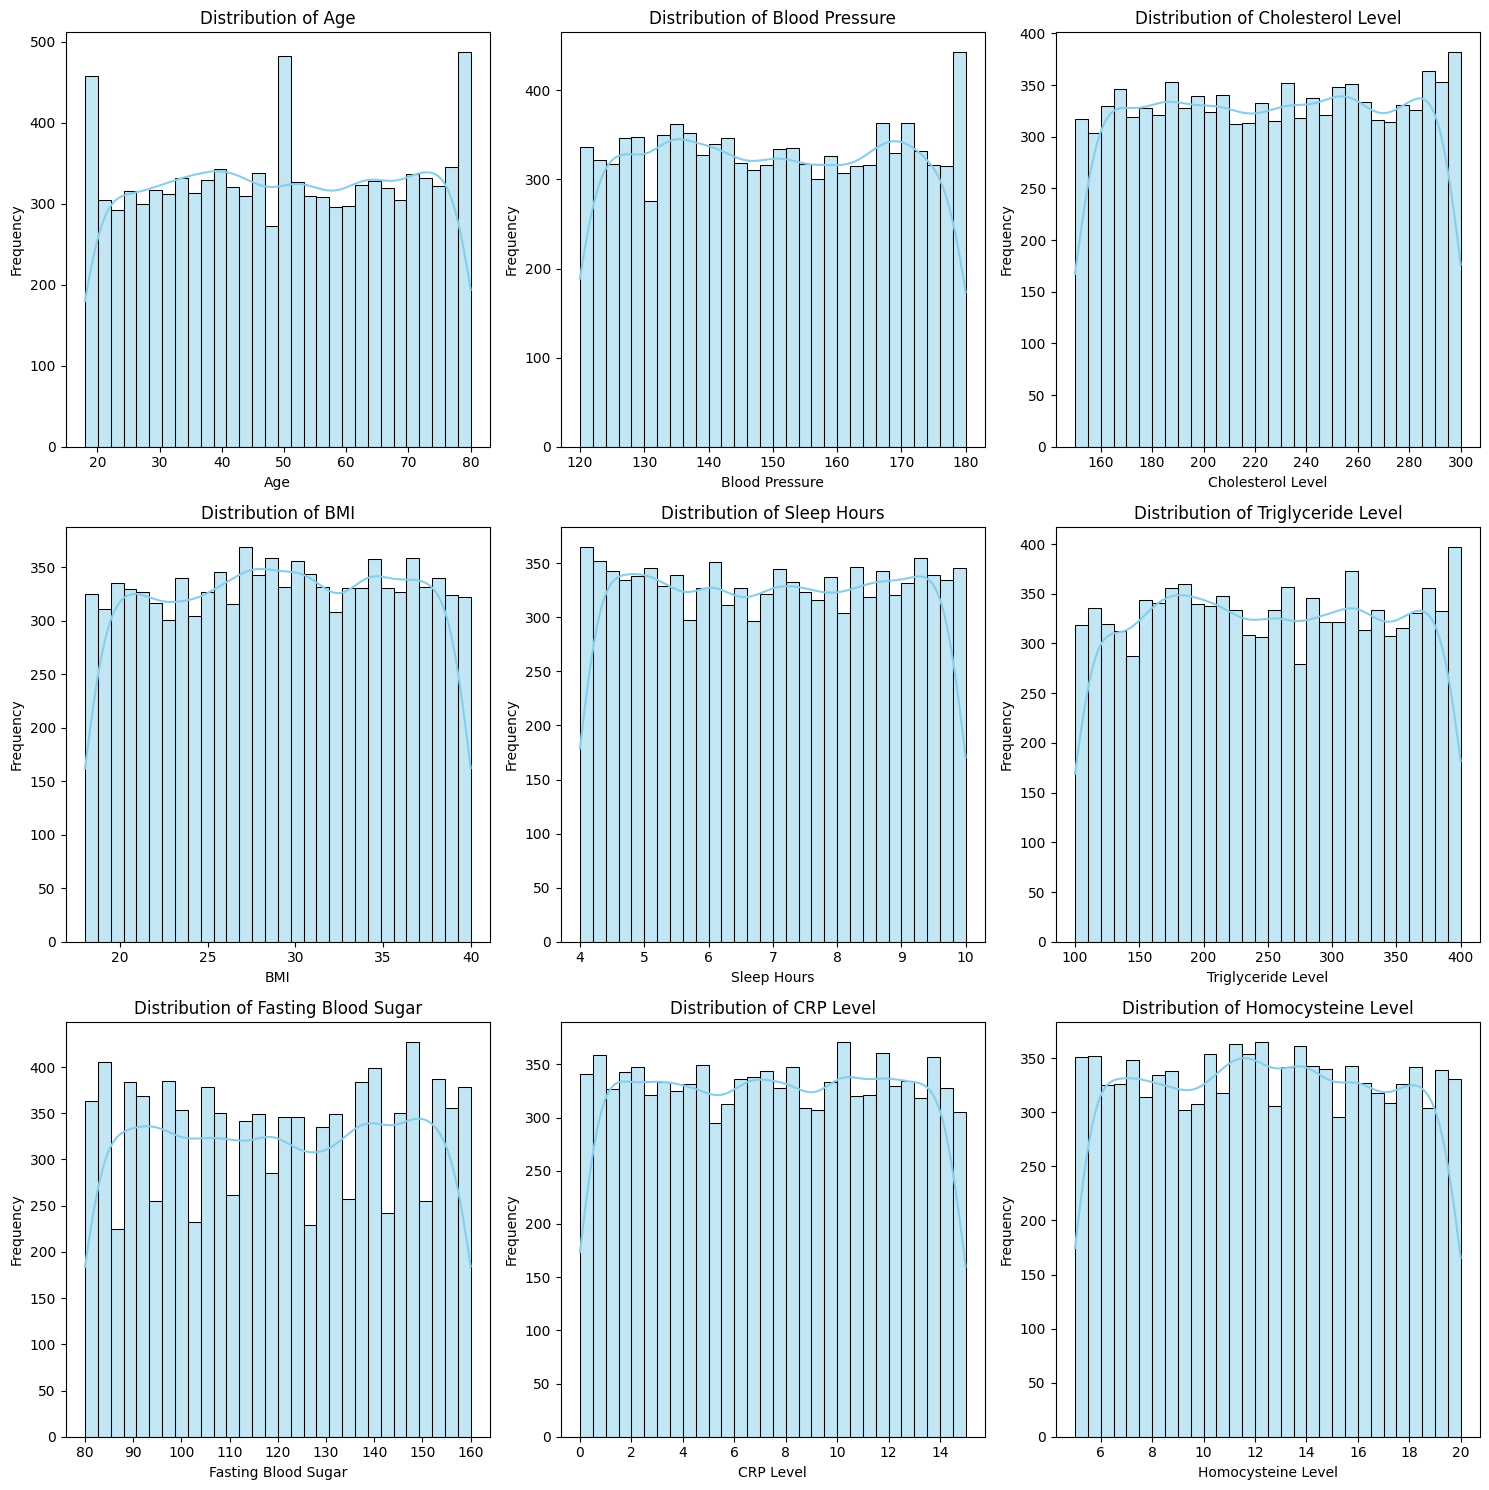

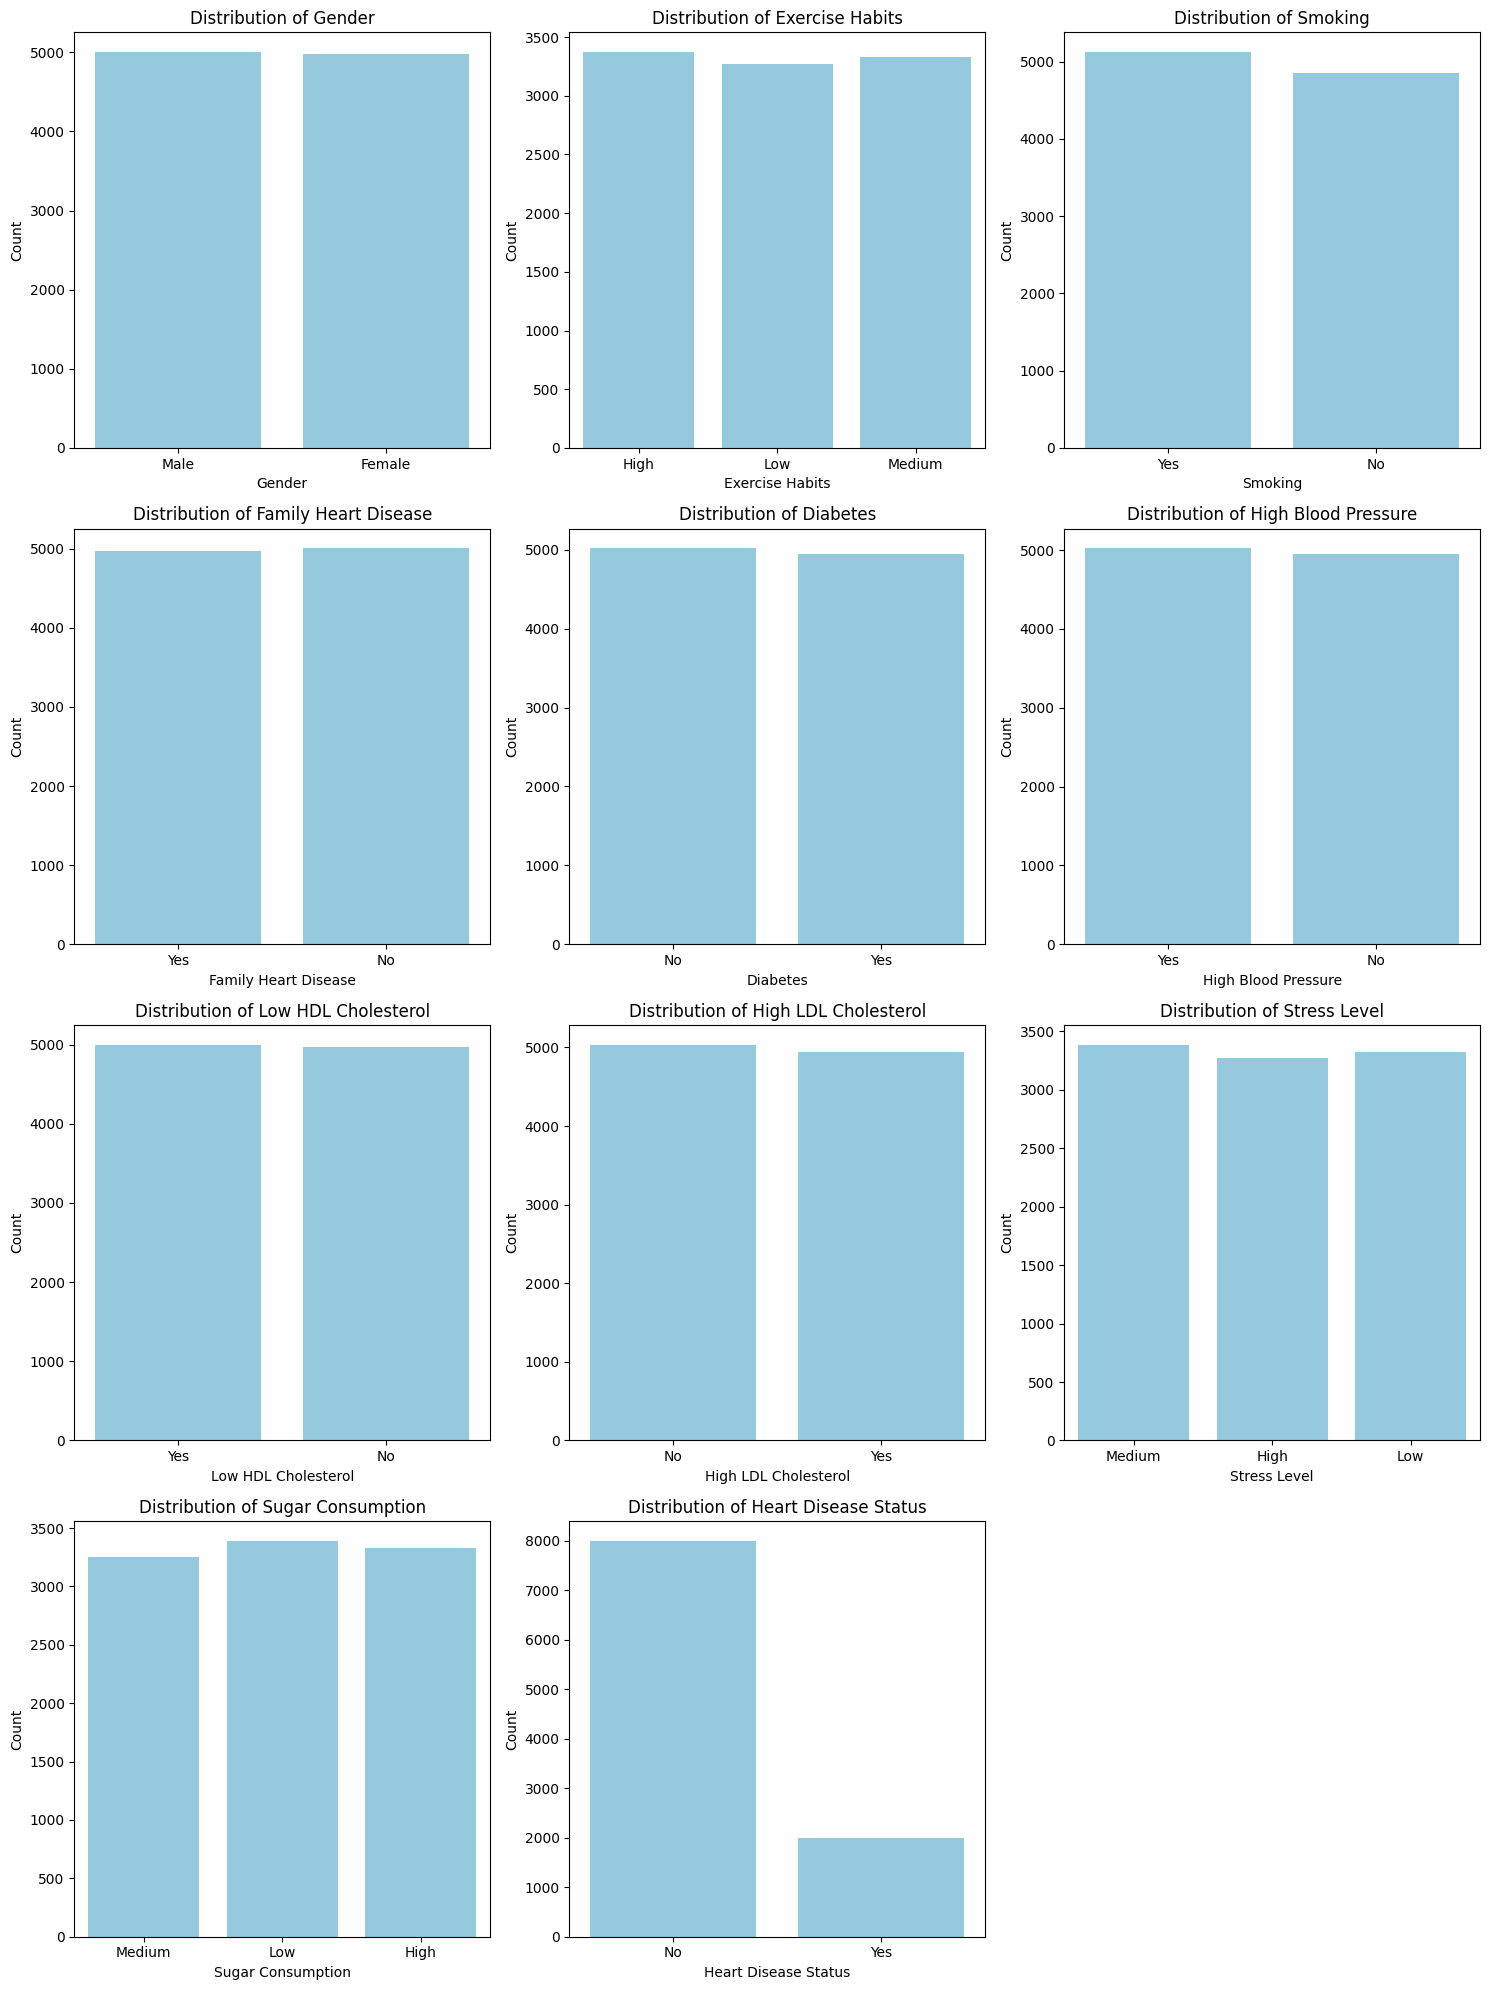

In [ ]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Plot numerical columns
num_rows = (len(numerical_cols) + 2) // 3  # 3 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot categorical columns
cat_rows = (len(categorical_cols) + 2) // 3  # 3 plots per row
plt.figure(figsize=(15, 5 * cat_rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(cat_rows, 3, i)
    sns.countplot(x=data[col], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

The graphs above show that the data is fairly evenly distributed across each column. For the numerical columns, I will replace missing values with the median of each respective column, as the median is less sensitive to outliers. Since the data is also evenly distributed across the categorical columns, it is appropriate to replace missing values with the mode of each column.

In [ ]:
# Replace missing values in numerical columns with the median
for column in numerical_cols:
    data[column] = data[column].fillna(data[column].median())

# Replace missing values in categorical columns with the mode
for column in categorical_cols:
    data[column] = data[column].fillna(data[column].mode()[0])

In [ ]:
# Check that there are no remaining rows with empty data
rows_with_nan = data.isna().any(axis=1).sum()
print(f"Number of rows with empty data: {rows_with_nan}")

Number of rows with empty data: 0


### Identifying highly correlated variables using Variance Inflation Factor (VIF)


To apply Variance Inflation Factor (VIF), we first need to convert categorical variables into numerical representations. For this, I opted to use one-hot encoding, a technique that transforms categorical data into a binary format suitable for machine learning algorithms. In one-hot encoding, each unique category in a feature is represented by a separate column, with values of 1 or 0 depending on whether the category is present for a given observation.

I chose one-hot encoding because it avoids making assumptions about the ordinality of the categories. For instance, mapping "Male" to 1 and "Female" to 0 would imply an ordering where "Male" > "Female," which is not appropriate. One-hot encoding treats all categories as distinct and independent, ensuring no such assumptions are introduced. This method can also handle ordinal features, such as "Stress Level" (with categories "High", "Medium", and "Low"), without losing the ordinal relationship.

Given that my dataset does not contain a large number of categories per feature, the increase in dimensionality from one-hot encoding is manageable and should not pose any significant issues.

In [ ]:
# Print out the unique values in each categorical column of the data
for column in categorical_cols:
    print(f"{column} unique values: {data[column].unique()}")

Gender unique values: ['Male' 'Female']
Exercise Habits unique values: ['High' 'Low' 'Medium']
Smoking unique values: ['Yes' 'No']
Family Heart Disease unique values: ['Yes' 'No']
Diabetes unique values: ['No' 'Yes']
High Blood Pressure unique values: ['Yes' 'No']
Low HDL Cholesterol unique values: ['Yes' 'No']
High LDL Cholesterol unique values: ['No' 'Yes']
Stress Level unique values: ['Medium' 'High' 'Low']
Sugar Consumption unique values: ['Medium' 'Low' 'High']
Heart Disease Status unique values: ['No' 'Yes']


In [ ]:
# List of categorical columns to encode
categorical_columns = [
    'Gender',
    'Exercise Habits',
    'Smoking',
    'Family Heart Disease',
    'Diabetes',
    'High Blood Pressure',
    'Low HDL Cholesterol',
    'High LDL Cholesterol',
    'Stress Level',
    'Sugar Consumption'
]

# Apply one-hot encoding using pandas' get_dummies
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Change true false values to 1 and 0
data = data.replace({True: 1, False: 0})

<ipython-input-103-180b48c57587>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [ ]:
# Heart disease is a binary value, so map Yes and No to 1 and 0 respectively
data['Heart Disease Status'] = data['Heart Disease Status'].map({'Yes': 1, 'No': 0}).astype(int)
data.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,...,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
0,56.0,153.0,155.0,24.991591,7.633228,342.0,120.0,12.969246,12.387250,0,...,1,1,0,1,1,0,0,1,0,1
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,0,...,0,1,1,0,1,0,0,0,0,1
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,0,...,0,0,0,0,1,1,1,0,1,0
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,0,...,1,1,0,1,0,1,0,0,0,0
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,0,...,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Confirm that the data has been successfully mapped
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,2,1,1,0,24.991591,1,1,0,1,7.633228,1,342.0,120.0,12.969246,12.387250,0
1,69.0,0,146.0,286.0,2,0,1,1,25.221799,0,1,0,2,8.744034,1,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,0,0,0,0,29.855447,0,1,1,0,4.440440,0,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,2,1,1,0,24.130477,1,0,1,2,5.249405,2,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,0,1,1,1,20.486289,1,0,0,2,7.030971,2,263.0,154.0,10.381259,8.153887,0


With all the categorical data successfully mapped to integers, we can now run VIF to identify any multicollinearity amongst the features in the dataset.



In [ ]:
# Extract all of the independent features and store them in X
X = data.drop(columns=['Heart Disease Status'])

# Create dataframe to store the VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Generate the VIF data
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# Print the VIF dataframe
print(vif_data)

                     feature       VIF
0                        Age  6.870722
1         Triglyceride Level  7.435552
2                  CRP Level  3.682918
3         Homocysteine Level  7.306876
4                Gender_Male  1.962937
5        Exercise Habits_Low  1.893068
6     Exercise Habits_Medium  1.908774
7                Smoking_Yes  2.006630
8   Family Heart Disease_Yes  1.949955
9               Diabetes_Yes  1.929758
10   High Blood Pressure_Yes  1.976772
11   Low HDL Cholesterol_Yes  1.969175
12  High LDL Cholesterol_Yes  1.931237
13          Stress Level_Low  1.943333
14       Stress Level_Medium  1.968058
15     Sugar Consumption_Low  1.954351
16  Sugar Consumption_Medium  1.900063


From the table above, features like 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', and 'Fasting Blood Sugar' exhibit very high VIF scores, all exceeding 10, which suggests significant multicollinearity. As a result, I will remove these variables from the analysis. Although 'Age', 'Triglyceride Level', and 'Homocysteine Level' have VIF values around 8, indicating a potential risk of collinearity, I will retain them in the model to avoid losing valuable data. Specifically, 'Age' remains important, as it is a key factor in the development of many diseases, with the risk of illness increasing as people age.

In [ ]:
# Removing variables with high multicollinearity
for column in ['Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Fasting Blood Sugar']:
  data.drop(column, axis=1, inplace=True)

In [ ]:
# Confirm that the necessary columns were removed successfully
data.head()

,Age,Triglyceride Level,CRP Level,Homocysteine Level,Heart Disease Status,Gender_Male,Exercise Habits_Low,Exercise Habits_Medium,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
0,56.0,342.0,12.969246,12.387250,0,1,0,0,1,1,0,1,1,0,0,1,0,1
1,69.0,133.0,9.355389,19.298875,0,0,0,0,0,1,1,0,1,0,0,0,0,1
2,46.0,393.0,12.709873,11.230926,0,1,1,0,0,0,0,0,1,1,1,0,1,0
3,32.0,293.0,12.509046,5.961958,0,0,0,0,1,1,0,1,0,1,0,0,0,0
4,60.0,263.0,10.381259,8.153887,0,1,1,0,1,1,1,1,0,0,0,0,0,0


### Visualizing the dataset's feature relationships


Now that we have addressed multicollinearity by removing highly correlated features, we can continue investigating the remaining parameters to identify any potential relationships.

#### Pairplot with KDE

The first visualization I will create is a **pairplot with Kernel Density Estimate (KDE)** on the diagonal. The KDE will provide insight into the distributions of each variable. The pairplot will display pairwise relationships between features, and I will include regression lines (colored red) to assess whether any linear relationships exist. Additionally, I will apply hues based on the presence or absence of heart disease, where orange represents those with heart disease and blue represents those without.

Note: Since the pairplot with KDE is most effective with numerical variables, I will exclude categorical features from this visualization.

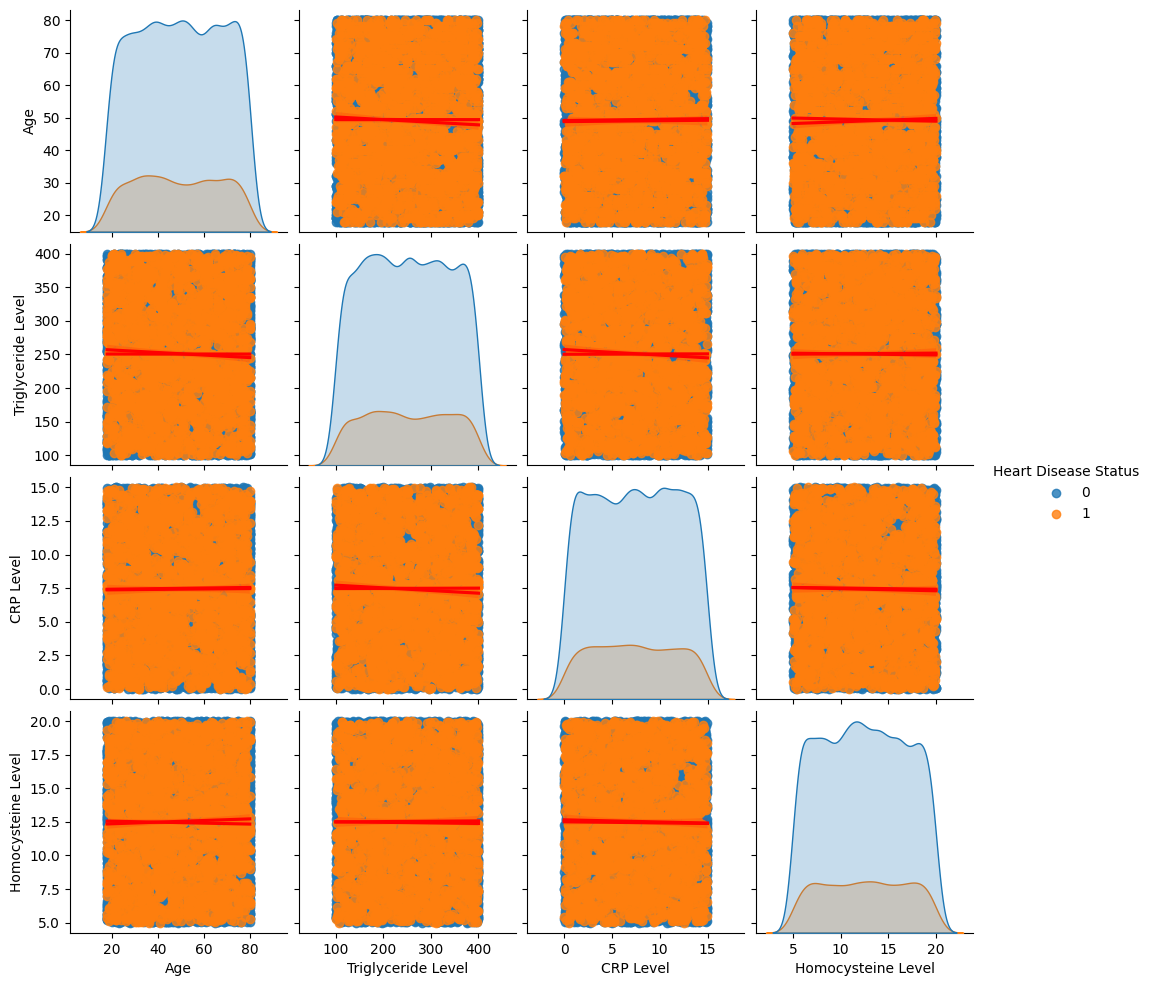

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns.tolist()

# Keep the categorical column 'Heart Disease Status'
categorical_columns = ['Heart Disease Status']

# Create a new dataframe with only numerical columns and the 'Heart Disease Status' column
selected_columns = numerical_columns + categorical_columns
pairplot_data = data[selected_columns]

# Create the pairplot with KDE
sns.pairplot(pairplot_data, diag_kind='kde', kind='reg', plot_kws={'line_kws': {'color':'red'}}, hue='Heart Disease Status')

The pairplot with KDE reveals no clear relationships among the numerical parameters. The blue and orange points are evenly distributed across the plots, with no noticeable clustering. Additionally, the linear regression lines are predominantly horizontal, indicating a lack of significant linear relationships between variables. This observation aligns with expectations after removing parameters with high VIF scores to address multicollinearity.

The KDE curves for the heart disease and no-heart-disease groups exhibit similar shapes, though the curves for individuals without heart disease are consistently shifted toward higher values across all parameters. Interpreting this shift for variables like Homocysteine, CRP, and Triglyceride levels is challenging due to my limited medical background. However, the age distribution is more straightforward to analyze.

The data suggests a potential trend where younger individuals in the dataset appear more likely to develop heart disease. This could stem from factors such as genetic predispositions, lifestyle choices, or other underlying medical conditions within the sample population. It is also important to note that this trend might reflect sampling bias; the dataset may inadvertently include more positive cases among younger individuals, leading to this apparent pattern.

#### Heatmap with clustering

Another way to visualize the relationships between numerical parameters is through a **heatmap with clustering**. A heatmap is a color-coded grid where rows represent individual samples, and columns represent different variables, with color intensity indicating the value. For this analysis, red represents higher values, while blue represents lower values. The clustering aspect adds a hierarchical tree structure, grouping similar samples together based on their values, which can help uncover patterns and relationships among the parameters.

To better understand potential differences between the groups, I created two clustered heatmaps: one for individuals with heart disease and another for those without. These visualizations aim to highlight any distinctive relationships or patterns within each group that could inform my model.

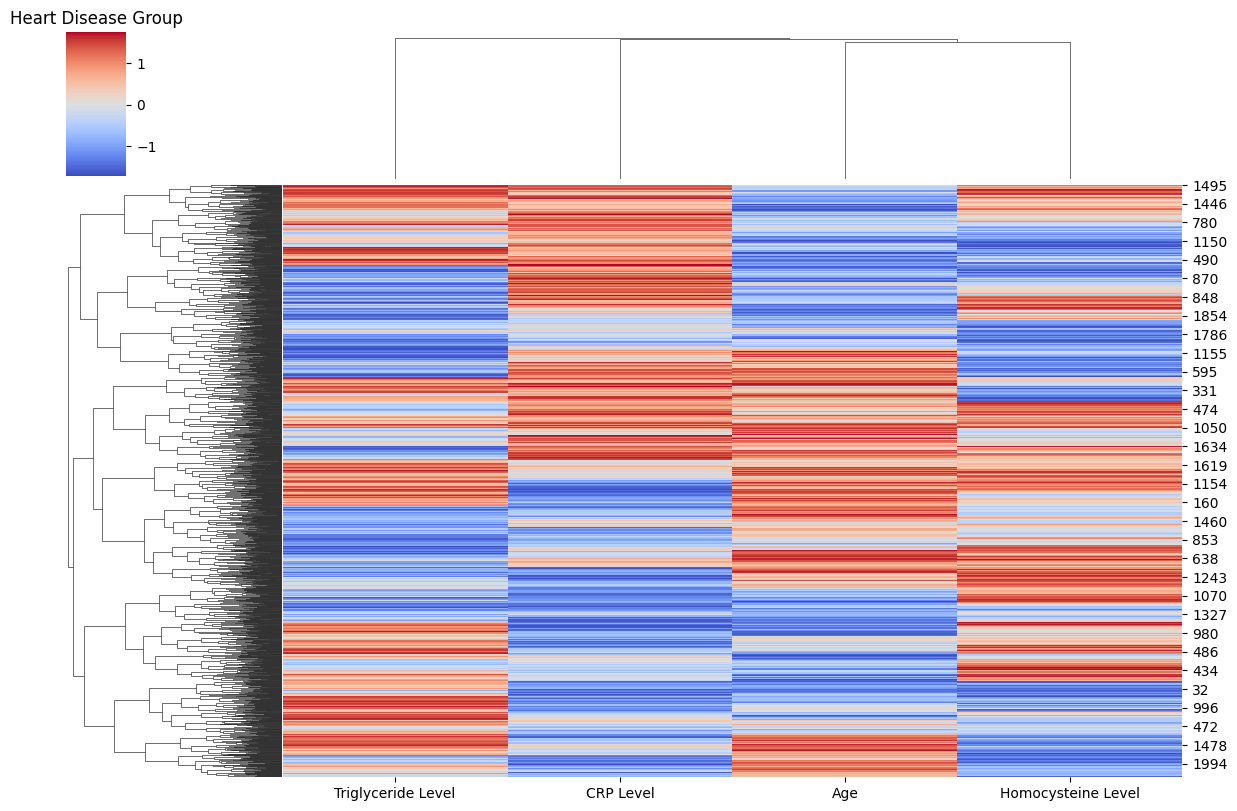

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


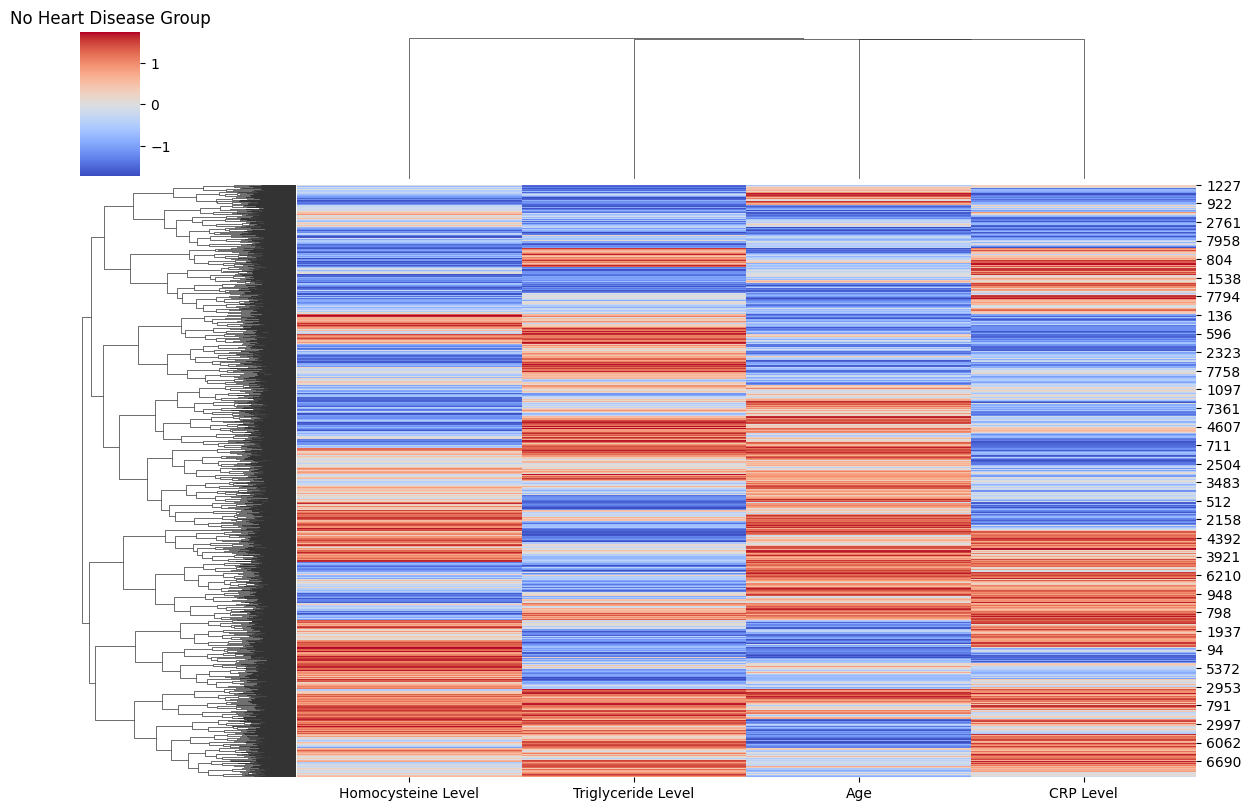

In [ ]:
# Filter the data based on Heart Disease status
heart_disease_data = data[data['Heart Disease Status'] == 1]  # Group with heart disease
no_heart_disease_data = data[data['Heart Disease Status'] == 0]  # Group without heart disease

# Select numerical columns
numerical_columns = heart_disease_data.select_dtypes(include=['float64']).columns.tolist()

# Standardize the numerical columns
scaler = StandardScaler()
heart_disease_scaled = scaler.fit_transform(heart_disease_data[numerical_columns])
no_heart_disease_scaled = scaler.fit_transform(no_heart_disease_data[numerical_columns])

# Create and display the heatmap for the Heart Disease Group
sns.clustermap(heart_disease_scaled, cmap='coolwarm', figsize=(12, 8), xticklabels=numerical_columns)
plt.title("Heart Disease Group")
plt.show()

# Create and display the heatmap for the No Heart Disease Group
sns.clustermap(no_heart_disease_scaled, cmap='coolwarm', figsize=(12, 8), xticklabels=numerical_columns)
plt.title("No Heart Disease Group")
plt.show()

The primary relationship I observe is that, in the heart disease group, many patients with high CRP and Homocysteine levels, along with advanced age, tend to cluster together. This pattern is noticeably absent in the non-disease group. This observation suggests that the combination of older age, elevated CRP levels, and high Homocysteine levels could potentially serve as a predictor for heart disease.

#### Bar plots for categorical variables

I also want to explore the relationships between the categorical features and heart disease status. To do this, I visualized the data using bar plots that compare the disease and non-disease groups. In these plots, the bars representing the disease group are colored orange, while those for the non-disease group are blue. Given that there were more data points for the non-disease group, I normalized the bars to represent the fraction of the total data points for each group, making it easier to compare the two groups. This approach helps to account for the imbalance in the dataset and provides a clearer view of any potential relationships.

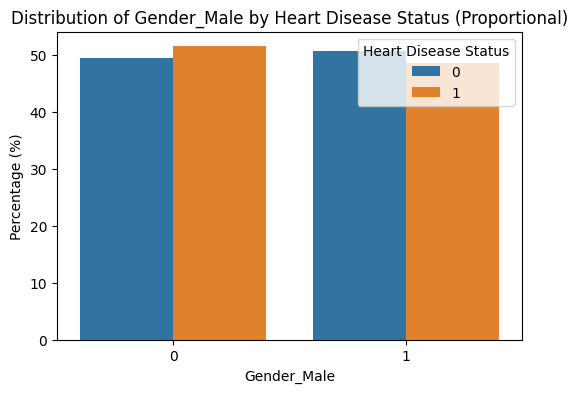

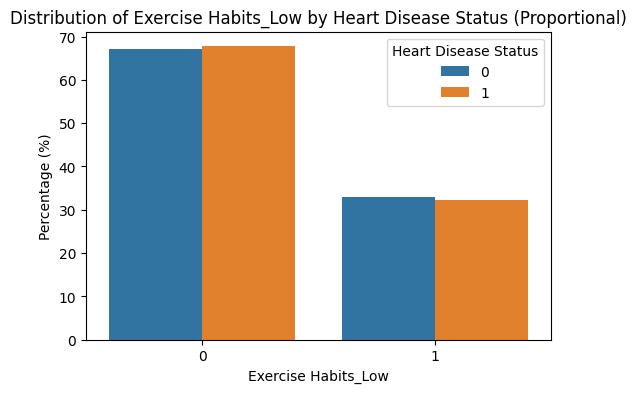

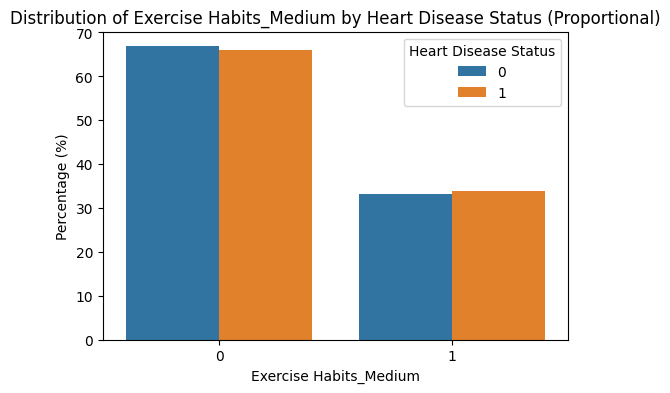

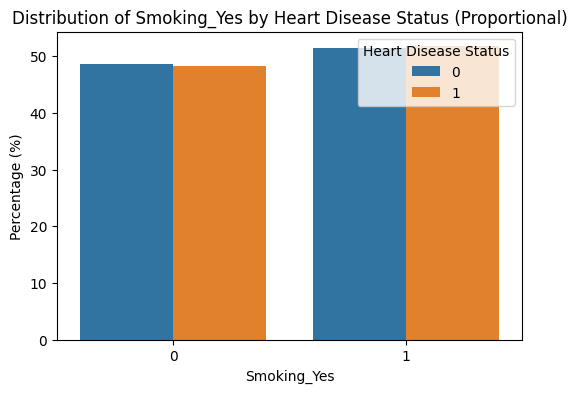

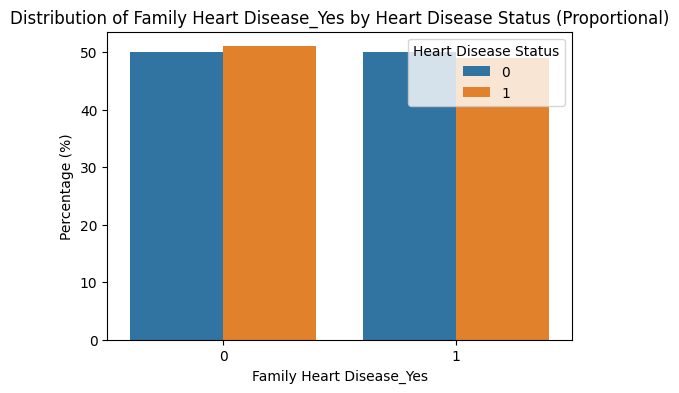

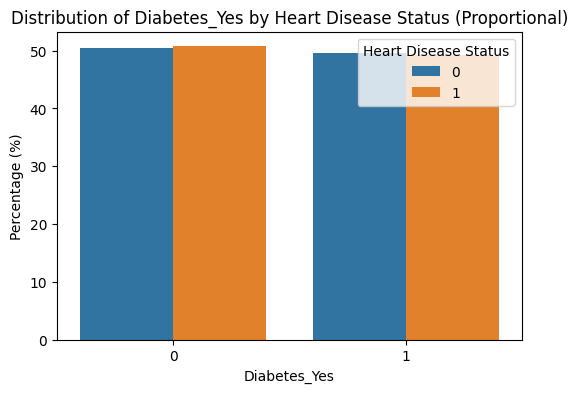

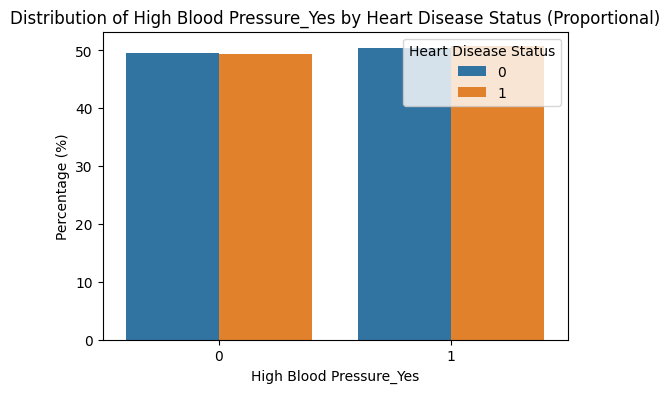

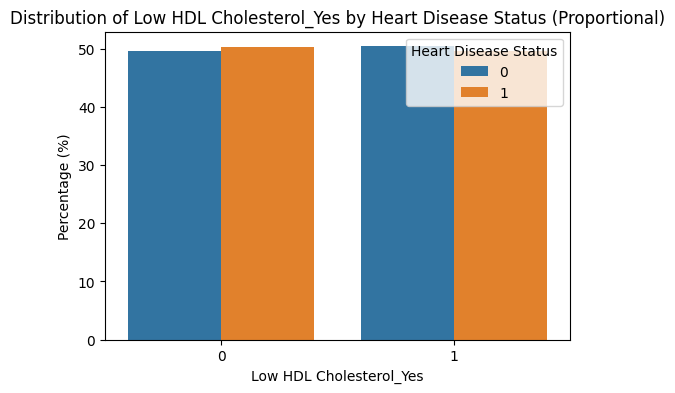

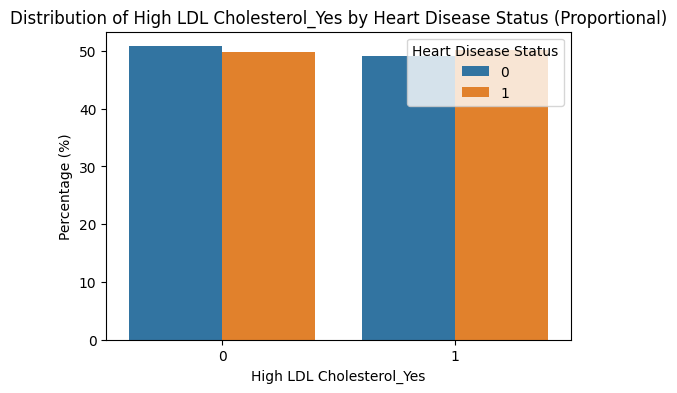

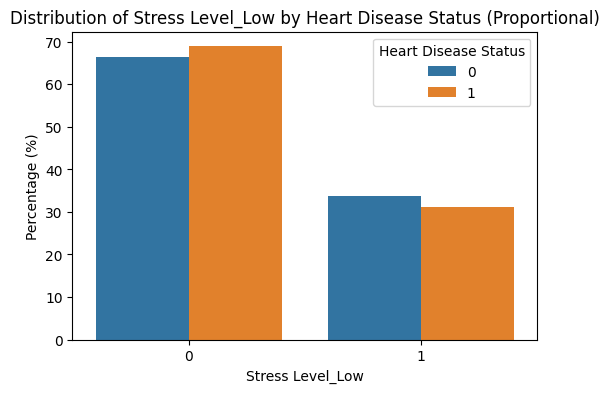

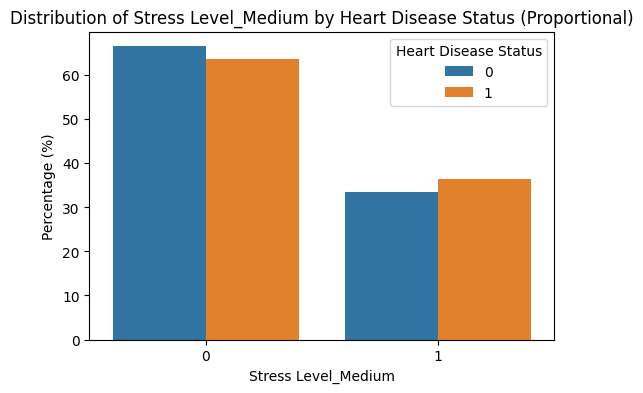

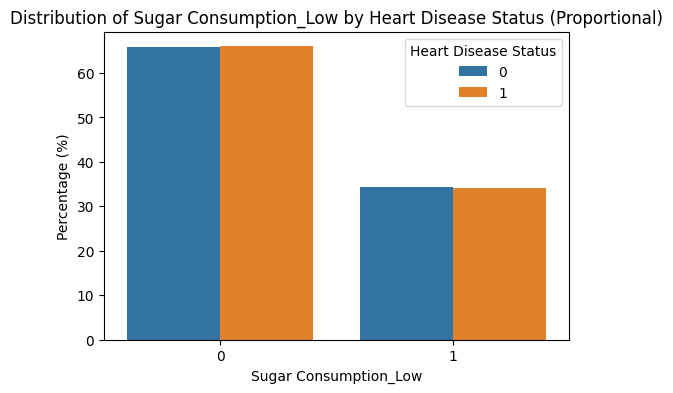

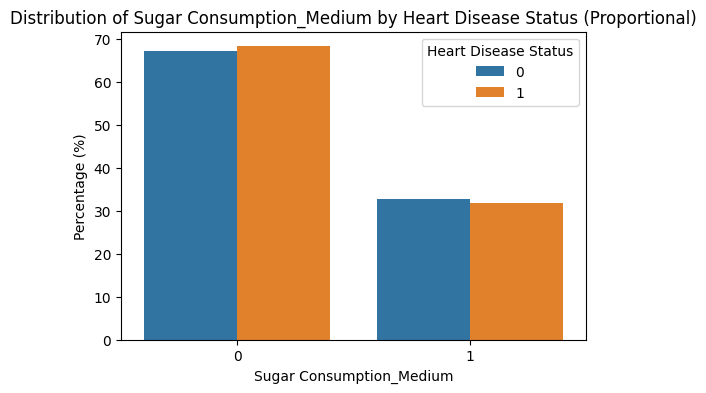

In [ ]:
# Extract the categorical features from the data
categorical_vars = ['Gender_Male',
                    'Exercise Habits_Low',
                    'Exercise Habits_Medium',
                    'Smoking_Yes',
                    'Family Heart Disease_Yes',
                    'Diabetes_Yes',
                    'High Blood Pressure_Yes',
                    'Low HDL Cholesterol_Yes',
                    'High LDL Cholesterol_Yes',
                    'Stress Level_Low',
                    'Stress Level_Medium',
                    'Sugar Consumption_Low',]

# Iterate through each categorical variable
for var in categorical_vars:
    # Calculate the counts for each category in each Heart Disease Status group
    counts = data.groupby([var, 'Heart Disease Status']).size().reset_index(name='count')

    # Calculate the total count for each Heart Disease Status group to normalize the counts
    total_counts = counts.groupby('Heart Disease Status')['count'].transform('sum')

    # Calculate the proportion for each category within each Heart Disease Status group
    counts['proportion'] = counts['count'] / total_counts * 100

    # Plot proportionalized countplot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=var, y='proportion', hue='Heart Disease Status', data=counts)

    # Set title and labels
    plt.title(f'Distribution of {var} by Heart Disease Status (Proportional)')
    plt.ylabel('Percentage (%)')
    plt.show()


Based on the graphs, I observed a few interesting relationships:

* Sex and heart disease: Among those with heart disease, the distribution of males and females was roughly equal. This suggests that heart disease is not strongly correlated with sex in this dataset, as both genders appear to be affected at similar rates.
* Stress level and heart disease: For individuals reporting a low stress level, a slightly higher proportion did not develop heart disease compared to those who did. This might suggest that stress level could have some association with heart disease development, though further investigation would be needed to confirm any causal relationship.

Overall, the proportions of categorical features were largely similar across the heart disease and non-disease groups. This observation implies that predicting heart disease is not solely determined by any one categorical predictor. Rather, it indicates that heart disease development likely depends on a more complex interaction between multiple categorical and numerical factors. These predictors must work together to form a more comprehensive model for identifying heart disease risk in individuals.

# Task 3: Logistic Regression Implementation

##Initialization Before Regressions

Before beginning my logistic regression implementations, there are some preparatory steps that I need to complete. Firstly, I need to separate the data into X and y components:

In [ ]:
# Splitting the data into inputs and outputs
data_X = data.drop(columns=["Heart Disease Status"])
data_y = data["Heart Disease Status"]

Next, I have to manage the imbalance in the data. As we can see, many more samples in the dataset are classified as not having heart disease:

In [ ]:
print(data['Heart Disease Status'].value_counts())

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64


The imbalance in the data could introduce bias towards the majority class (the non-disease group) in the model. To address this, I chose to use the Synthetic Minority Over-Sampling Technique (SMOTE) to generate synthetic samples and balance the dataset. SMOTE works by selecting samples that are close in feature space, drawing a line between the examples, and generating new samples at points along this line.

I decided against using random downsampling because it would involve removing 6,000 samples from my dataset, which I felt would result in a significant loss of valuable information. While random upsampling could have been an alternative, I opted for SMOTE because it generates synthetic data points rather than duplicating existing ones. This allows the model to learn from a more diverse set of examples, potentially improving its generalization and reducing the risk of overfitting.

The following is my implementation of SMOTE:

Source
* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
# Balance data using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(data_X, data_y)  # Convert to numpy for SMOTE

Next, I decided to standardize the features inside of X. My data varies a lot in terms of scale and units, which could introduce bias into my model. I use StandardScalar to ensure all features contribute equally to the model.

Sources:
* https://www.geeksforgeeks.org/logistic-regression-and-the-feature-scaling-ensemble/
* https://www.yourdatateacher.com/2022/06/13/which-models-require-normalized-data/#:~:text=Logistic%20regression%20requires%20normalization%20as,problem%20during%20the%20training%20phase.&text=If%20you%20train%20a%20linear,as%20indicators%20of%20feature%20importance.

In [ ]:
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

Next, I need to convert my DataFrame data into tensors so that they can be used in my algorithms. I want to note that X is transposed as I want the feature data in the form where each feature is a row and each sample is a column.

In [ ]:
# Converting the data to tensors
X = torch.tensor(X_resampled_scaled, dtype=torch.float32).T
y = torch.tensor(y_resampled.values, dtype=torch.float32)

Lastly, I will define a custom sigmoid function as it will be needed to implement the logistic regression:

In [ ]:
# Definition of the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

## Useful function definitions

To evaluate the performance of my logistic regression algorithms, it is important that I am able to calulate metrics such as accuracy, precision, etc. These metrics require information from the confusion matrix, specifically:

* True Positives
* False Positives
* True Negatives
* False Negatives

The following function takes the predicitions made by a given model and the list of actual values. It uses this information to return TP, FP, TN and FN values to be used in the calculation of comparison metrics.

In [ ]:
# Function that calculates TP, TN, FP and FN for a set of predictions
def get_prediction_info(predictions, y):
  # True Positive (TP): Predicted 1 and Actual 1
  TP = torch.sum((predictions == 1) & (y == 1)).item()

  # True Negative (TN): Predicted 0 and Actual 0
  TN = torch.sum((predictions == 0) & (y == 0)).item()

  # False Positive (FP): Predicted 1 but Actual 0
  FP = torch.sum((predictions == 1) & (y == 0)).item()

  # False Negative (FN): Predicted 0 but Actual 1
  FN = torch.sum((predictions == 0) & (y == 1)).item()

  return TP, TN, FP, FN

It is crucial to implement a method of cross-validation to prevent overfitting and ensure the model is tested appropriately. To accomplish this, I utilize k-fold cross-validation in the following function. The dataset is divided into k subsets, and the model is trained on all subsets except one, which is used for testing. This process is repeated such that each subset serves as the testing fold at least once.

Throughout this process, I track various metrics. Specifically, I provide a list of metric functions, one of which might be for accuracy, and these are evaluated during each iteration. The average value for each metric across all iterations is returned at the end of the cross-validation process. Additionally, the cost values for each iteration are stored, and their averages are computed horizontally to provide a list of average costs at each step of the algorithm.

This function effectively trains and tests a given logistic regression model and provides detailed information that can be used to evaluate its performance, including metrics, costs, and the final results after cross-validation.

Source:
* https://www.geeksforgeeks.org/cross-validation-machine-learning/

In [ ]:
def cross_validate(X, y, model_func, params, k=5, metric_funcs=None):
  kf = KFold(n_splits=k, shuffle=True, random_state=42)
  metrics = [[] for _ in range(len(metric_funcs))]
  all_costs = []
  for train_index, val_index in kf.split(X.T):  # Transpose X for sklearn compatibility
      # Split data into training and validation sets
      X_train, X_val = X[:, train_index], X[:, val_index]
      y_train, y_val = y[train_index], y[val_index]

      # Train the model using the provided function
      w, b, costs = model_func(X_train, y_train, **params)

      # Append costs array to all costs
      all_costs.append(costs)

      # Make predictions on the validation set
      A_val = sigmoid(torch.matmul(w.T, X_val) + b)
      predictions_val = torch.round(A_val)

      # Calculate performance metrics
      TP, TN, FP, FN = get_prediction_info(predictions_val, y_val)
      for i in range(len(metric_funcs)):
        metrics[i].append(metric_funcs[i](TP, TN, FP, FN))

  # Average costs step by step
  avg_costs = np.mean(np.array(all_costs), axis=0)

  # Average all the metric
  avg_metrics = np.mean(np.array(metrics), axis=1)

  return avg_metrics, avg_costs

For the above function to work as expected, it is necessary that I have metric functions defined. I decided to use accuracy, recall, false positive rate (FPR), precision, and F1 score as my evaluation metrics. The following are short descriptions of each metric:

* Accuracy: The proportion of correctly classified instances out of the total instances.
* Recall: The proportion of actual positive instances correctly identified by the model.
* False Positive Rate (FPR): The proportion of actual negative instances incorrectly classified as positive.
* Precision: The proportion of predicted positive instances that are actually positive.
* F1 Score: The harmonic mean of precision and recall, providing a balance between them.

In [ ]:
# Function that returns the accuracy
def get_accuracy(TP, TN, FP, FN):
  return (TP + TN) / (TP + TN + FP + FN)

# Function that returns the recall
def get_recall(TP, TN, FP, FN):
  return TP / (TP + FN)

# Function that returns the false positive rate
def get_fpr(TP, TN, FP, FN):
  return FP / (FP + TN)

# Function that returns the precision
def get_precision(TP, TN, FP, FN):
  return TP / (TP + FP)

# Function that returns the F1 score
def get_f1(TP, TN, FP, FN):
  return (2 * TP) / (2*TP + FP + FN)

##Batch Gradient Descent

The following is my implementation of **Batch Gradient Descent** to fit my logistic regression model. In batch gradient descent, all data points are taken into consideration when updating the values of parameter weights and the bias term. The updates being performed in batch gradient descent can be expressed mathematcially as follows:

$$ w = w - \alpha \frac{1}{n} \sum_{i=1}^{n} \frac{\partial L}{\partial w_i}
$$

$$ b = b - \alpha \frac{1}{n} \sum_{i=1}^{n} \frac{\partial L}{\partial b}
$$

Where the variables represent the following:
* $w$ is the set of weights for each parameter
* $n$ is the total number of samples in the dataset
* $\alpha$ is the learning rate
* $b$ is the bias term
* $\frac{\partial L}{\partial w_i}$ is the gradient with respect to an individual weight for an individual parameter
* $\frac{\partial L}{\partial b}$ is the gradient of the loss function with respect to $b$

In [ ]:
def batch_gradient_descent(X, y, learning_rate, iterations):

    # Initialize weights and bias
    w = torch.randn((X.shape[0], 1), dtype=torch.float32)
    b = torch.tensor(0.0, dtype=torch.float32)

    # Create list to store the costs
    costs = []

    # Gradient Descent Loop
    for i in range(iterations):
        # Calculate all the predictions
        A = sigmoid(torch.matmul(w.T, X) + b)

        # Calculate the weighted loss
        l = -1 * (y.T * torch.log(A) + (1 - y.T) * torch.log(A))
        cost = 1/X.shape[1] * torch.sum(l)
        costs.append(cost)

        # Performing gradient descent
        dz = A - y.T
        db = 1/X.shape[1] * torch.sum(dz)
        dw = 1/X.shape[1] * torch.matmul(X, dz.T)

        # Update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

    return w, b, costs

##Stochastic Gradient Descent

In **Stochastic Gradient Descent**, the model parameters are updated using only one randomly chosen sample at a time, rather than the entire dataset. The updates can be expressed mathematically as follows:

$$ w = w - \alpha \frac{\partial L}{\partial w_i} \quad \text{(for each sample \( i \))} $$

$$ b = b - \alpha \frac{\partial L}{\partial b_i} \quad \text{(for each sample \( i \))} $$

In my implementation below, I allow the user to input a custom number of iterations. This means that the weights are updated 'iterations' number of times.

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):
    # Initialize weights and bias
    w = torch.randn((X.shape[0], 1), dtype=torch.float32)
    b = torch.tensor(0.0, dtype=torch.float32)

    # Create list to store the costs
    costs = []

    # Gradient descent loop
    for _ in range(iterations):

        # Randomly sample an index from the dataset
        random_index = random.randint(0, X.shape[1]-1)

        # Extract the current person from the tensor
        X_i = X[:, random_index].view(-1,1)
        y_i = y[random_index].view(-1,1)

        # Generate individual prediction
        a = sigmoid(torch.matmul(w.T, X_i) + b)

        # Calculate the weighted loss
        l = -1 * (y_i * torch.log(a) + (1 - y_i) * torch.log(1 - a))
        cost = torch.sum(l).item()  # Scalar cost for the single sample
        costs.append(cost)

        # Finding partial derivatives
        dz = a - y_i
        db = dz
        dw = X_i * dz

        # Update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

    return w, b, costs

##Mini-Batch Gradient Descent

In **Mini-Batch Gradient Descent**, the model parameters are updated using a small subset (mini-batch) of samples rather than the entire dataset or just one sample. This approach strikes a balance between the computational efficiency of batch gradient descent and the faster convergence of SGD.

$$ w = w - \alpha \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial w_i} \quad \text{(over a mini-batch of size \( m \))} $$

$$ b = b - \alpha \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial b_i} \quad \text{(over a mini-batch of size \( m \))} $$

In my implementation, I allow the user to specify both the number of iterations and the batch size. Each iteration represents a complete cycle of splitting the dataset into batches, with the model parameters being updated after each batch is processed.

In [ ]:
def minibatch_gradient_descent(X, y, learning_rate, iterations, batch_size):
    # Combine features and labels into a TensorDataset
    dataset = TensorDataset(X.T, y)

    # Create the DataLoader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize weights and bias
    w = torch.randn((X.shape[0], 1), dtype=torch.float32)
    b = torch.tensor(0.0, dtype=torch.float32)

    # Create array to store the costs
    costs = []

    for _ in range(iterations):
        for batch_X, batch_y in dataloader:
          # Store in other variables for readability
          curr_X = batch_X.T
          curr_y = batch_y

          # Calculate predictions for current batch
          curr_A = sigmoid(torch.matmul(w.T, curr_X) + b)

          # Calculate the weighted loss
          l = -1 * (curr_y.T * torch.log(curr_A) + (1 - curr_y.T) * torch.log(curr_A))
          cost = 1/curr_X.shape[1] * torch.sum(l)
          costs.append(cost)

          # Performing gradient descent
          dz = curr_A - curr_y.T
          db = 1/curr_X.shape[1] * torch.sum(dz)
          dw = 1/curr_X.shape[1] * torch.matmul(curr_X, dz.T)

          # Update weights and bias
          w = w - learning_rate * dw
          b = b - learning_rate * db

    return w, b, costs

## Comparison of Convergence Behavior

After extensive manual parameter tuning and experimentation, I optimized each gradient descent algorithm as much as possible with a goal of to achieving peak performance on the dataset. The following is a comparison of the three algorithms in terms of accuracy.

In [ ]:
# Define parameters
batch_params = {'learning_rate': 0.05, 'iterations': 1000}
stochastic_params = {'learning_rate': 0.001, 'iterations': 20000}
mini_batch_params = {'learning_rate': 0.005, 'iterations': 20, 'batch_size': 100}

# Cross validate each method
avg_acc_batch, avg_costs_batch = cross_validate(X, y, batch_gradient_descent, batch_params, k=5, metric_funcs=[get_accuracy])
avg_acc_stochastic, avg_costs_stochastic = cross_validate(X, y, stochastic_gradient_descent, stochastic_params, k=5, metric_funcs=[get_accuracy])
avg_acc_mini_batch, avg_costs_mini_batch = cross_validate(X, y, minibatch_gradient_descent, mini_batch_params, k=5, metric_funcs=[get_accuracy])

In [ ]:
# Assuming avg_acc_batch, avg_acc_stochastic, and avg_acc_mini_batch are numpy arrays
print(f"{'Method':<30}{'Avg Accuracy':<15}")
print("=" * 45)
print(f"{'Batch Gradient Descent':<30}{avg_acc_batch[0]:<15.4f}")
print(f"{'Stochastic Gradient Descent':<30}{avg_acc_stochastic[0]:<15.4f}")
print(f"{'Mini-Batch Gradient Descent':<30}{avg_acc_mini_batch[0]:<15.4f}")


Method                        Avg Accuracy   
Batch Gradient Descent        0.7634         
Stochastic Gradient Descent   0.7512         
Mini-Batch Gradient Descent   0.7275         


I explored the performance limits and convergence characteristics of three gradient descent implementations on my dataset. Through extensive experimentation, I found that logistic regression consistently achieved around 75% accuracy across all three variants - batch, stochastic, and mini-batch gradient descent. This appears to be the fundamental performance ceiling for logistic regression on this particular dataset.

To better understand how each algorithm reaches this accuracy level, I created a visualization comparing their convergence paths. Since each algorithm requires a different number of iterations to reach optimal performance, I normalized their progress on the x-axis as a percentage of total iterations. This normalization allows for a direct comparison of how the cost function evolves during training, regardless of the actual number of steps taken.

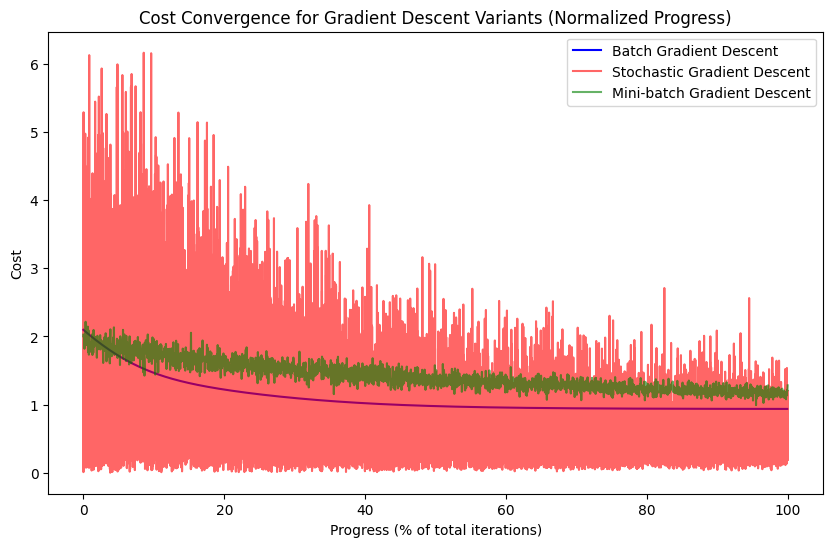

In [ ]:
# Normalize iteration indices as percentages (0 to 100)
batch_iters = [i / len(avg_costs_batch) * 100 for i in range(len(avg_costs_batch))]
stochastic_iters = [i / len(avg_costs_stochastic) * 100 for i in range(len(avg_costs_stochastic))]
minibatch_iters = [i / len(avg_costs_mini_batch) * 100 for i in range(len(avg_costs_mini_batch))]

# Plot the costs
plt.figure(figsize=(10, 6))

plt.plot(batch_iters, avg_costs_batch, label="Batch Gradient Descent", color='blue')
plt.plot(stochastic_iters, avg_costs_stochastic, label="Stochastic Gradient Descent", color='red', alpha=0.6)
plt.plot(minibatch_iters, avg_costs_mini_batch, label="Mini-batch Gradient Descent", color='green', alpha=0.6)

# Add labels, legend, and title
plt.xlabel("Progress (% of total iterations)")
plt.ylabel("Cost")
plt.title("Cost Convergence for Gradient Descent Variants (Normalized Progress)")
plt.legend()
plt.show()

From the observations above, we can draw the following conclusions about the behavior of the three gradient descent techniques:

* Batch Gradient Descent: Offers stable convergence.
* Stochastic Gradient Descent: Converges quickly, but exhibits noisy behavior, as indicated by the large, erratic fluctuations in the cost function during training.
* Mini-Batch Gradient Descent: Strikes a balance between speed and stability, capturing some of the speed advantages of stochastic gradient descent while significantly reducing the noise, as seen by the smaller variations in cost.

One misleading aspect of this graph that requires clarification is the apparent superiority of Batch Gradient Descent in terms of convergence speed. While Batch appears to converge fastest, this is due to a different definition of "iteration" for each algorithm. In each iteration of Batch, the gradient for every datapoint is computed and applied to update the weights, meaning fewer iterations are needed. However, each iteration of Batch is computationally expensive and much slower than those in Stochastic or Mini-Batch Gradient Descent. This discrepancy in how iterations are defined leads to the false impression that Batch is the most efficient method, when in fact it is the slowest of the three techniques.

# Task 4: Optimization Techniques and Advanced Comparison

## Momentum

 SGD with Momentum helps accelerate convergence by adding a momentum term that smooths out updates and reduces oscillations. This term is based on the past gradients, making the updates more persistent in the direction of the gradient. It can be expressed mathematically as follows:

$$v_w = \beta v_{w-1} + (1 - \beta) \frac{\partial L}{\partial w}$$

$$v_b = \beta v_{b-1} + (1 - \beta) \frac{\partial L}{\partial b}$$

$$w = w - \alpha \cdot v_w$$

$$ b = b - \alpha \cdot v_b$$

Where:
* $v_w$ and $v_b$ are the velocities (momentum) for $w$ and $b$
* $\beta$ is the momentum coefficient
* $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$ are the gradients of the loss function with respect to $w$ and $b$
* $\alpha$ is the learning rate



In [ ]:
def sgd_momentum(X, y, learning_rate, beta, iterations):
    # Initialize weights and bias
    w = torch.randn((X.shape[0], 1), dtype=torch.float32)
    b = torch.tensor(0.0, dtype=torch.float32)

    # Initialize velocities
    v_w = torch.tensor(0.0, dtype=torch.float32)
    v_b = torch.tensor(0.0, dtype=torch.float32)

    # Create list to store the costs
    costs = []

    # Gradient descent loop
    for _ in range(iterations):

        # Randomly sample an index from the dataset
        random_index = random.randint(0, X.shape[1]-1)

        # Extract the current person from the tensor
        X_i = X[:, random_index].view(-1,1)
        y_i = y[random_index].view(-1,1)

        # Generate individual prediction
        a = sigmoid(torch.matmul(w.T, X_i) + b)

        # Calculate the weighted loss
        l = -1 * (y_i * torch.log(a) + (1 - y_i) * torch.log(1 - a))
        cost = torch.sum(l).item()  # Scalar cost for the single sample
        costs.append(cost)

        # Finding partial derivatives
        dz = a - y_i
        db = dz
        dw = X_i * dz

        # Finding the velocities
        v_b = beta * v_b + (1 - beta) * db
        v_w = beta * v_w + (1 - beta) * dw

        # Update weights and bias using velocities
        w = w - learning_rate * v_w
        b = b - learning_rate * v_b

    return w, b, costs

## RMSProp

RMSProp adjusts the learning rate for each parameter by dividing the gradient by the square root of the exponential weighted moving averages of squared gradients. This helps prevent the learning rate from becoming too large in the case of large gradients and too small for small gradients. The update rules are:

$$ S_w = \beta S_{w_{prev}} + (1 - \beta) \left(\frac{\partial L}{\partial w}\right)^2 $$

$$ S_b = \beta S_{b_{prev}} + (1 - \beta) \left(\frac{\partial L}{\partial b}\right)^2 $$

$$ w = w - \frac{\alpha}{\sqrt{S_w} + \epsilon} \cdot \frac{\partial L}{\partial w} $$

$$ b = b - \frac{\alpha}{\sqrt{S_b} + \epsilon} \cdot \frac{\partial L}{\partial b} $$


Where:

* $S_w$ and $S_b$ are the exponentially weighted averages of the squared gradients for $w$ and $b$
* $\beta$ is the decay factor for the moving average
* $\alpha$ is the learning rate
* $\epsilon$ is a small value to prevent division by zero
* $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$ are the gradients of the loss function with respect to $w$ and $b$

Source:
* https://www.youtube.com/watch?v=ajI_HTyaCu8&t=165s

In [ ]:
def sgd_rmsprop(X, y, learning_rate, beta, iterations, epsilon=1e-8):
    # Initialize weights and bias
    w = torch.randn((X.shape[0], 1), dtype=torch.float32)
    b = torch.tensor(0.0, dtype=torch.float32)

    # Initialize exponentially weighted moving averages
    s_dw = torch.zeros_like(w)
    s_db = torch.tensor(0.0, dtype=torch.float32)

    # Create list to store the costs
    costs = []

    # Gradient descent loop
    for _ in range(iterations):

        # Randomly sample an index from the dataset
        random_index = random.randint(0, X.shape[1]-1)

        # Extract the current person from the tensor
        X_i = X[:, random_index].view(-1, 1)
        y_i = y[random_index].view(-1, 1)

        # Generate individual prediction
        a = sigmoid(torch.matmul(w.T, X_i) + b)

        # Calculate the weighted loss
        l = -1 * (y_i * torch.log(a) + (1 - y_i) * torch.log(1 - a))
        cost = torch.sum(l).item()  # Scalar cost for the single sample
        costs.append(cost)

        # Finding partial derivatives
        dz = a - y_i
        db = dz
        dw = X_i * dz

        # Update the exponentially weighted moving averages of squared gradients
        s_dw = beta * s_dw + (1 - beta) * (dw ** 2)
        s_db = beta * s_db + (1 - beta) * (db ** 2)

        # Update weights and bias using RMSprop formula
        w = w - learning_rate * (dw / (torch.sqrt(s_dw) + epsilon))
        b = b - learning_rate * (db / (torch.sqrt(s_db) + epsilon))

    return w, b, costs

## Adam

Adam combines the benefits of Momentum and RMSProp into a single optimization technique. It incorporates both the velocity terms from Momentum and the exponential weighted moving averages of squared gradients from RMSProp. The update equations are as follows:

$$v_w = \beta v_{w-1} + (1 - \beta) \frac{\partial L}{\partial w}$$

$$v_b = \beta v_{b-1} + (1 - \beta) \frac{\partial L}{\partial b}$$

$$ S_w = \beta S_{w-1} + (1 - \beta) \left(\frac{\partial L}{\partial w}\right)^2 $$

$$ S_b = \beta S_{b-1} + (1 - \beta) \left(\frac{\partial L}{\partial b}\right)^2 $$

$$ w = w - \alpha\frac{v_w}{\sqrt{S_w} + \epsilon} \cdot \frac{\partial L}{\partial w} $$

$$ b = b - \alpha\frac{v_b}{\sqrt{S_b} + \epsilon} \cdot \frac{\partial L}{\partial b} $$

Source:
* https://www.youtube.com/watch?v=tuU59-G1PgU&t=1s

In [ ]:
def sgd_adam(X, y, learning_rate, beta, iterations, epsilon=1e-8):
  # Initialize weights and bias
    w = torch.randn((X.shape[0], 1), dtype=torch.float32)
    b = torch.tensor(0.0, dtype=torch.float32)

    # Initialize velocities
    v_w = torch.tensor(0.0, dtype=torch.float32)
    v_b = torch.tensor(0.0, dtype=torch.float32)

    # Initialize exponentially weighted moving averages
    s_dw = torch.zeros_like(w)
    s_db = torch.tensor(0.0, dtype=torch.float32)

    # Create list to store the costs
    costs = []

    # Gradient descent loop
    for _ in range(iterations):

        # Randomly sample an index from the dataset
        random_index = random.randint(0, X.shape[1]-1)

        # Extract the current person from the tensor
        X_i = X[:, random_index].view(-1,1)
        y_i = y[random_index].view(-1,1)

        # Generate individual prediction
        a = sigmoid(torch.matmul(w.T, X_i) + b)

        # Calculate the weighted loss
        l = -1 * (y_i * torch.log(a) + (1 - y_i) * torch.log(1 - a))
        cost = torch.sum(l).item()  # Scalar cost for the single sample
        costs.append(cost)

        # Finding partial derivatives
        dz = a - y_i
        db = dz
        dw = X_i * dz

        # Finding the velocities
        v_b = beta * v_b + (1 - beta) * db
        v_w = beta * v_w + (1 - beta) * dw

        # Update the exponentially weighted moving averages of squared gradients
        s_dw = beta * s_dw + (1 - beta) * (dw ** 2)
        s_db = beta * s_db + (1 - beta) * (db ** 2)

        # Update weights and bias using velocities
        w = w - learning_rate * (v_w / torch.sqrt(s_dw + epsilon))
        b = b - learning_rate * (v_b / torch.sqrt(s_db + epsilon))

    return w, b, costs

## Comparison with equal hyperparameters

To compare the performance of Momentum, RMSprop, and Adam, I used equal hyperparameters then calculated the following comparison metrics:

*   Accuracy
*   Recall
*   False Positive Rate
*   Precision
*   F1-Score

The following code runs all the algorithms, computes their respective metrics, and compiles the results into a table for easy comparison.

Source:
* https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall


In [ ]:
# Define parameters
sgd_params = {'learning_rate': 0.001, 'iterations': 10000}
mom_params = {'learning_rate': 0.001, 'beta': 0.96, 'iterations': 10000}
rms_params = {'learning_rate': 0.001, 'beta': 0.96, 'iterations': 10000}
adm_params = {'learning_rate': 0.001, 'beta': 0.96, 'iterations': 10000}

# Define the metrics to calculate for comparison
metric_funcs = [get_accuracy, get_recall, get_fpr, get_precision, get_f1]

# Cross validate each method
avg_metrics_sgd, avg_costs_sgd = cross_validate(X, y, stochastic_gradient_descent, sgd_params, k=5, metric_funcs=metric_funcs)
avg_metrics_mom, avg_costs_mom = cross_validate(X, y, sgd_momentum, mom_params, k=5, metric_funcs=metric_funcs)
avg_metrics_rms, avg_costs_rms = cross_validate(X, y, sgd_rmsprop, rms_params, k=5, metric_funcs=metric_funcs)
avg_metrics_adm, avg_costs_adm = cross_validate(X, y, sgd_adam, adm_params, k=5, metric_funcs=metric_funcs)

In [145]:
# Print a comparison of the metrics
metrics_list = [avg_metrics_sgd, avg_metrics_mom, avg_metrics_rms, avg_metrics_adm]
algorithms = ['Vanilla SGD', 'Momentum', 'RMSProp', 'Adam']
print("Comparison metrics averaged over k-fold cross validation\n")
print(f"{'Algorithm':<15}{'Accuracy':<15}{'Recall':<15}{'False Positive Rate':<25}{'Precision':<15}{'F1 Score':<15}")
print("="*100)
for i in range(len(metrics_list)):
  print(f"{algorithms[i]:<15}{metrics_list[i][0]:<15.3f}{metrics_list[i][1]:<15.3f}{metrics_list[i][2]:<25.3f}{metrics_list[i][3]:<15.3f}{metrics_list[i][4]:<15.3f}")

Comparison metrics averaged over k-fold cross validation

Algorithm      Accuracy       Recall         False Positive Rate      Precision      F1 Score       
Vanilla SGD    0.690          0.690          0.310                    0.690          0.690          
Momentum       0.716          0.708          0.276                    0.719          0.714          
RMSProp        0.751          0.736          0.234                    0.758          0.747          
Adam           0.758          0.743          0.228                    0.765          0.754          


## Hyperparameter tuning

I decided to explore the potential for improving the performance of my algorithms through an automated hyperparameter tuning approach. For this, I implemented **Random Search**, a technique that involves creating a grid of hyperparameter values and randomly selecting combinations from it to train the model. For each combination, a score is computed, allowing the different configurations to be ranked. The combination yielding the best score is then returned. The number of iterations, or the number of combinations to select, depends on the user's available resources and the time allocated for training.

I opted for random search due to its simplicity and efficiency, particularly when working with large datasets where exhaustive grid search can become computationally expensive.

This is the source I used to help with my below implementation: https://www.kaggle.com/code/willkoehrsen/intro-to-model-tuning-grid-and-random-search

## Writing a function to evaluate the success of a set of parameters

The following is my scoring function. I have weighted accuracy most heavily because it reflects the overall performance of the model. Recall is also given a higher weight due to its importance in ensuring that positive cases are classified correctly, particularly in medical diagnostics where missing a positive case can have serious consequences. The False Positive Rate (FPR) is assigned a negative weight since it is crucial to minimize false positives, especially in contexts where misclassifying negatives as positives is detrimental. Precision, while important for ensuring that positive classifications are accurate, is less heavily weighted than accuracy, as the latter encompasses both true positives and false negatives. Finally, I have weighted the F1 Score heavily because it provides a balanced measure that takes both precision and recall into account, making it a more comprehensive metric for evaluating model performance.

In [ ]:
def calculate_score(metric_results):

  # Assign weights to tweak the importance of different metrics
  weights = {
      'accuracy': 0.3,    # Weight for accuracy
      'recall': 0.25,     # Weight for recall
      'fpr': -0.2,        # Negative weight since lower FPR is better
      'precision': 0.15,  # Weight for precision
      'f1': 0.3           # Weight for F1 score
  }

  # Calculate the score
  score = sum(metric_results[metric] * weight for metric, weight in weights.items())
  return score


## Writing a function to perform random search hyperparameter tuning

The following is my implementation of Random Search hyperparameter tuning. Note that it prints out the current iteration so you can track the progress of the algorithm as it runs.

In [ ]:
def random_search(model_func, param_grid, X, y, max_evals = 30, num_k_folds = 5):

  # Create a DataFrame to store results
  results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                         index = list(range(max_evals)))

  # Define the metrics to calculate for comparison
  metric_funcs = [get_accuracy, get_recall, get_fpr, get_precision, get_f1]

  # Keep searching until reaching max evaluations
  for i in range(max_evals):

    print(f"Iteration {i+1} of {max_evals}")

    # Choose random hyperparameters
    hyperparameters = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}

    # Run the algorithm using the random parameters
    avg_metrics, _ = cross_validate(X, y, model_func, hyperparameters, num_k_folds, metric_funcs=metric_funcs)

    # Assemble dict for score function
    metric_results = {
        'accuracy': avg_metrics[0],
        'recall': avg_metrics[1],
        'fpr': avg_metrics[2],
        'precision': avg_metrics[3],
        'f1': avg_metrics[4]
    }

    # Generate score
    curr_score = calculate_score(metric_results)

    # Add entry to DataFrame
    results.loc[i, :] = [curr_score, hyperparameters, i]

  # Extract the best result to return
  best_result = results.loc[results['score'].idxmax()]

  return {
      'score': best_result['score'],
      'params': best_result['params']
  }

## Creating a hyperparameter grid

The following is the hyperparameter grid from which the random_search function randomly selects combinations. The ranges for each hyperparameter were derived from my initial manual experimentation, where I identified values that yielded promising results. However, further refinement and exploration of additional hyperparameter values could improve the grid and potentially enhance the model's performance.

In [ ]:
# Create a parameter grid with possible parameters to choose from
param_grid = {
    'learning_rate': np.logspace(-4, -1, 4).tolist(),
    'beta': np.linspace(0.9, 0.99, 4).tolist(),
    'iterations': list(range(5000, 25000, 5000))
}

## Finding parameters for Momentum SGD

In [ ]:
# Running the random search algorithm for Momentum and storing results
best_mom = random_search(sgd_momentum, param_grid, X, y, max_evals = 10, num_k_folds = 5)

# Print the best parameters
print(best_mom)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
{'score': 0.7089876465344651, 'params': {'learning_rate': 0.01, 'beta': 0.96, 'iterations': 15000}}


## Finding parameters for RMSProp SGD

In [ ]:
# Running the random search algorithm for RMSProp and storing results
best_rms = random_search(sgd_rmsprop, param_grid, X, y, max_evals = 10, num_k_folds = 5)

# Print the best parameters
print(best_rms)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
{'score': 0.7131468423154791, 'params': {'learning_rate': 0.001, 'beta': 0.99, 'iterations': 15000}}


## Finding parameters for Adam SGD

In [ ]:
# Running the random search algorithm for Adam and storing results
best_adm = random_search(sgd_adam, param_grid, X, y, max_evals = 10, num_k_folds = 5)

# Print the best parameters
print(best_adm)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
{'score': 0.7142797605248339, 'params': {'learning_rate': 0.001, 'beta': 0.9, 'iterations': 20000}}


## New metrics with optimal hyperparameters


To assess the impact of the optimized hyperparameters, I ran all three functions using the best parameter combinations identified through the hyperparameter tuning process. I then compiled the performance metrics for each function into a table, allowing for a direct comparison with the previously calculated metrics.

In [ ]:
# Collect metrics used for evaluation
metric_funcs = [get_accuracy, get_recall, get_fpr, get_precision, get_f1]

# Run the cross validations with the optimal parameters
best_metrics_mom, _ = cross_validate(X, y, sgd_momentum, best_mom['params'], k=5, metric_funcs=metric_funcs)
best_metrics_rms, _ = cross_validate(X, y, sgd_rmsprop, best_rms['params'], k=5, metric_funcs=metric_funcs)
best_metrics_adm, _ = cross_validate(X, y, sgd_adam, best_adm['params'], k=5, metric_funcs=metric_funcs)

In [146]:
# Print a comparison of the metrics
metrics_list = [best_metrics_mom, best_metrics_rms, best_metrics_adm]
algorithms = ['Momentum', 'RMSProp', 'Adam']
print("Comparison metrics averaged over k-fold cross validation\n")
print(f"{'Algorithm':<15}{'Accuracy':<15}{'Recall':<15}{'False Positive Rate':<25}{'Precision':<15}{'F1 Score':<15}")
print("="*100)
for i in range(len(metrics_list)):
  print(f"{algorithms[i]:<15}{metrics_list[i][0]:<15.3f}{metrics_list[i][1]:<15.3f}{metrics_list[i][2]:<25.3f}{metrics_list[i][3]:<15.3f}{metrics_list[i][4]:<15.3f}")

Comparison metrics averaged over k-fold cross validation

Algorithm      Accuracy       Recall         False Positive Rate      Precision      F1 Score       
Momentum       0.756          0.745          0.233                    0.762          0.753          
RMSProp        0.760          0.745          0.226                    0.767          0.756          
Adam           0.762          0.743          0.220                    0.772          0.757          


In [ ]:
# Copy-pasted table of metric calculations from manual hyperparameter tuning above
'''
Comparison metrics averaged over k-fold cross validation

Algorithm      Accuracy       Recall         False Positive Rate      Precision      F1 Score
====================================================================================================
Vanilla SGD    0.690          0.690          0.310                    0.690          0.690
Momentum       0.716          0.708          0.276                    0.719          0.714
RMSProp        0.751          0.736          0.234                    0.758          0.747
Adam           0.758          0.743          0.228                    0.765          0.754
'''

It's clear that the optimized parameters obtained through Random Search offer a notable performance improvement, even with the relatively small max_evals value of 10. Across all three algorithms, accuracy, recall, precision, and F1 scores all showed consistent increases, while the false positive rate (FPR) decreased, further indicating enhanced model performance.

## Discussion of algorithm trade-offs

The following sections discuss the complexity, interpretability, and suitability for large-scale datasets of Momentum, RMSProp, and Adam.

#### Momentum

* Computational Complexity: Momentum introduces a velocity term, which involves a few simple operations like addition, subtraction, and gradient multiplication. While this adds some overhead compared to vanilla SGD, the additional computational cost is minimal, making it only marginally more expensive.
* Interpretability: Adding momentum terms makes the model slightly less interpretable compared to vanilla SGD. However, the concept of momentum—where the model builds up speed in the direction of the gradient—can be intuitively understood as a moving object gaining momentum. This keeps the overall interpretability intact.
* Suitability for Large-Scale Datasets: Momentum performs well with large datasets since it accelerates the convergence of vanilla SGD. This means it can provide faster training times without introducing significant additional computational burdens, making it a practical choice for large-scale problems.

####RMSProp

* Computational Complexity: RMSProp requires maintaining the exponentially decaying average of squared gradients and calculating the square of the gradients for each parameter at every step. These operations make it more computationally expensive than vanilla SGD and Momentum, as it adds more overhead per iteration.
* Interpretability: Similar to Momentum, the concept behind RMSProp is relatively straightforward—adjusting the weights and biases based on recent gradient history. However, I found RMSProp to be a bit harder to fully grasp compared to Momentum due to its added complexity in maintaining the decaying averages.
* Suitability for Large-Scale Datasets: RMSProp could be more challenging to use with larger datasets because of its higher computational cost. However, with the use of more powerful hardware and parallel computing, it remains feasible for large-scale applications, though it might not be as efficient as Momentum in this context.

####Adam

* Computational Complexity: Adam is the most computationally expensive of the three algorithms because it combines both velocity and exponentially decaying averages. This added complexity leads to more calculations per iteration, increasing its computational cost.
* Interpretability: Due to its added complexity, Adam is less interpretable than Momentum and RMSProp. While the individual concepts of Momentum and RMSProp are relatively simple, their combined interaction in Adam introduces complexity that can make understanding the optimization process more difficult.
* Suitability for Large-Scale Datasets: Despite its complexity, Adam's ability to combine the strengths of Momentum and RMSProp allows it to converge faster and more effectively than Momentum and RMSProp. This makes it a popular choice, especially in fields like deep learning, where performance and convergence speed are crucial for handling large-scale datasets.

Sources:
* https://www.geeksforgeeks.org/adam-optimizer/

#### Conclusion

In conclusion, each optimization algorithm—Momentum, RMSProp, and Adam—offers a distinct set of trade-offs. Momentum is computationally efficient, easy to interpret, and suitable for large datasets. RMSProp, while slightly more expensive, handles variable gradients well and remains fairly interpretable, though it may struggle with very large datasets. Adam, the most complex, combines the strengths of both Momentum and RMSProp, delivering faster convergence at the cost of reduced interpretability. The choice between them depends on balancing computational resources, interpretability, and performance for the task at hand.

# Statement About Use of Generative AI

Throughout this project, I leveraged generative AI models to help refine the structure and grammar of my writing. I also used them to format some of my code for better readability and consulted them for guidance on which NumPy, Pandas, and other functions to use before researching and implementing them myself. All content presented is my own, and any external sources referenced for this assignment are properly cited or linked where appropriate. I wasn't sure of the exact citation format for AI usage, so I felt this paragraph would suffice.

I thoroughly enjoyed completing this assignment and deepening my understanding of so many new concepts!